# Read realtime data from IOOS Sensor Map via ERDDAP
Exploring use of Python to formulate requests to the ERDDAP service from [IOOS Sensor Map](https://sensors.ioos.us/#map) data requests and process the responses.  

## Initialize

In [1]:
%matplotlib inline
import pandas as pd

In [2]:
url='http://erddap.axiomdatascience.com/erddap/tabledap/sensor_service.csv?time,depth,station,parameter,unit,value&time>=2016-11-02T09:45:00Z&station=%22urn:ioos:station:nerrs:wqbchmet%22&parameter=%22Wind%20Speed%22&unit=%22knot%22'
print(url)
df = pd.read_csv(url,index_col='time',parse_dates=True,skiprows=[1])  # skip the units row 

http://erddap.axiomdatascience.com/erddap/tabledap/sensor_service.csv?time,depth,station,parameter,unit,value&time>=2016-11-02T09:45:00Z&station=%22urn:ioos:station:nerrs:wqbchmet%22&parameter=%22Wind%20Speed%22&unit=%22knot%22


In [3]:
df.head()

depth                          station   parameter  unit  \
time                                                                            
2016-11-30 15:45:00    0.0  urn:ioos:station:nerrs:wqbchmet  Wind Speed  knot   
2016-11-30 15:30:00    0.0  urn:ioos:station:nerrs:wqbchmet  Wind Speed  knot   
2016-11-30 15:15:00    0.0  urn:ioos:station:nerrs:wqbchmet  Wind Speed  knot   
2016-11-30 15:00:00    0.0  urn:ioos:station:nerrs:wqbchmet  Wind Speed  knot   
2016-11-30 14:45:00    0.0  urn:ioos:station:nerrs:wqbchmet  Wind Speed  knot   

                       value  
time                          
2016-11-30 15:45:00  1.36070  
2016-11-30 15:30:00  1.16630  
2016-11-30 15:15:00  1.16630  
2016-11-30 15:00:00  1.16630  
2016-11-30 14:45:00  0.77754

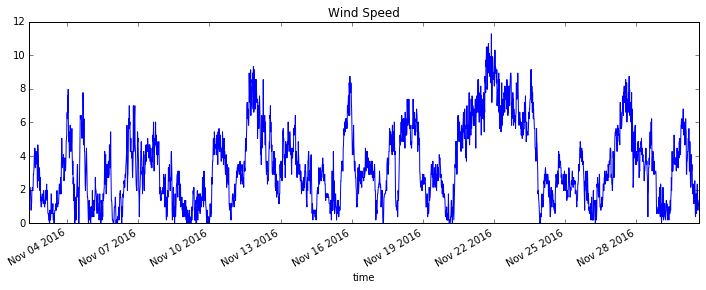

In [4]:
df['value'].plot(figsize=(12,4),title=df['parameter'][0]);

## Obtain data from ERDDAP

In [5]:
# Use ERDDAP's built-in relative time functionality to get last 48 hours:
start='now-7days'
stop='now'
# or specify a specific period:
#start = '2016-09-06T00:00:00Z'
#stop =  '2016-11-07T00:00:00Z'

In [6]:
url='http://erddap.axiomdatascience.com/erddap/tabledap/sensor_service.csv?time,depth,station,parameter,unit,value&\
station=%22urn:ioos:station:nerrs:wqbchmet%22&parameter=%22Wind%20Speed%22&unit=%22knot%22\
&time>={}&time<={}'.format(start,stop)
print(url)

http://erddap.axiomdatascience.com/erddap/tabledap/sensor_service.csv?time,depth,station,parameter,unit,value&station=%22urn:ioos:station:nerrs:wqbchmet%22&parameter=%22Wind%20Speed%22&unit=%22knot%22&time>=now-7days&time<=now


In [7]:
df = pd.read_csv(url,index_col='time',parse_dates=True,skiprows=[1])  # skip the units row 

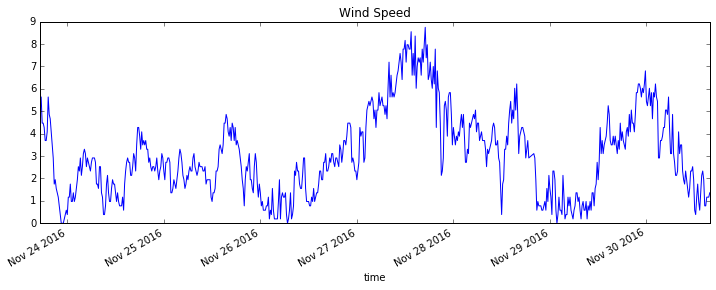

In [8]:
df['value'].plot(figsize=(12,4),title=df['parameter'][0]);